In [2]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np  

In [ ]:
import os
# directory = ['diode', 'dust', 'multi', 'PID', 'single']
directory = ['single']
iml = []
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        iml.append(f)

In [2]:
path = "FLIR0"

poi=[]
for i in range(105,108):
  filename=path + str(i) + ".jpg"
  panel= cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
  poi.append(panel)

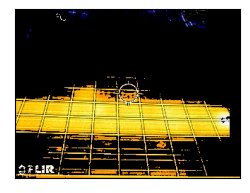

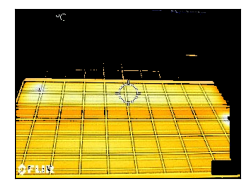

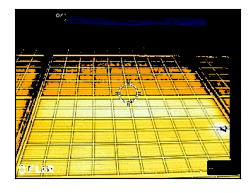

In [4]:
def croppanel(panel):

    # Convert the image into HSV
    hsv_image=cv2.cvtColor(panel, cv2.COLOR_RGB2HSV)

    # Set the orange range
    # mask = cv2.inRange(hsv_image, (1, 190, 200), (17, 255, 255))
    # res1 = cv2.bitwise_and(panel,panel, mask=mask)

    # Set a yellow range
    mask_y = cv2.inRange(hsv_image, (17, 0, 25), (120, 255, 255))
    res2 = cv2.bitwise_and(panel,panel, mask=mask_y)
    
    # Set a white range
    mask_w = cv2.inRange(hsv_image, (0,0,10), (50, 20, 255))
    res3 = cv2.bitwise_and(panel,panel, mask=mask_w)
    
    # Combine the three masks
    result=res2+ res3

    # Clean up the segmentation using a blur
    #blur = cv2.GaussianBlur(result, (7, 7), 0)
    
    img_arr = np.array(result)
  
    # Turning the pixel values of the 400x400 pixels to black 
    img_arr[0 : 30, 0 : 52] = (0, 0, 0)
    img_arr[0 :30, 270:320] = (0, 0, 0)
    img_arr[0 :235, 306:320] = (0, 0, 0)
    img_arr[220:235, 280:320] = (0, 0, 0)
    # Creating an image out of the previously modified array
    img = Image.fromarray(img_arr)
    return img

results = [croppanel(panel) for panel in poi]
for i in range(len(poi)):
    plt.subplot(1, 2, 1)
#     fig = plt.imshow(poi[i])
#     fig.axes.get_xaxis().set_visible(False)
#     fig.axes.get_yaxis().set_visible(False)
#     plt.subplot(1, 2, 2)
    fig2 = plt.imshow(results[i])
    fig2.axes.get_xaxis().set_visible(False)
    fig2.axes.get_yaxis().set_visible(False)
    plt.savefig( str(i) +".jpg")
    plt.show()

In [5]:
from PIL import Image

# Open image
image = Image.open('0.jpg')

# Filter
def filter(image):
    # Get image dimesions
    width, height = image.size

    # Grayscale filter
    for x in range(width):
        for y in range(height):
            # Get original pixel colors
            r, g, b = image.getpixel((x, y))
    
            # New pixel colors
            r_ = g_ = b_ = (r+g+b)/3

            # Change new pixel
            new_pixel = (int(r_), int(g_), int(b_))
            new_image.putpixel((x, y), new_pixel)

    # Filter magic happens here

    return new_image

# Show result
new_image = filter(image)
new_image.show()
new_image.save('F1.jpg')
new_image.show()

NameError: name 'new_image' is not defined

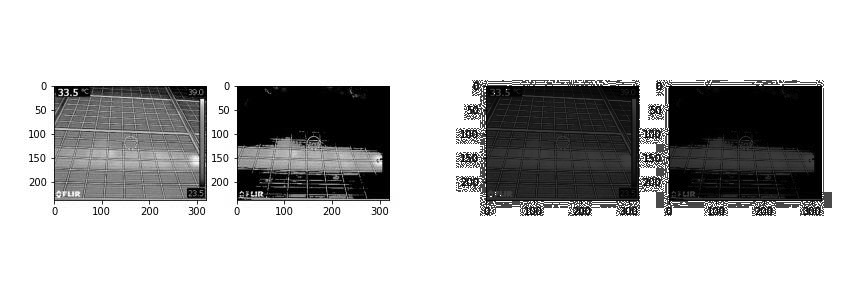

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('F1.jpg')
img1=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create Histograms Equalization
equ = cv2.equalizeHist(img1)

# stack images sideways
res = np.hstack((img1, equ))

# show image input vs output
cv2_imshow(res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

# Load the image
img = cv2.imread("0.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Display the original and segmented images
cv2.imshow("Original", img)
cv2.imshow("Segmented", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
sample_image = cv2.imread('0.jpg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)


plt.axis('off');
plt.imshow(img)

NameError: name 'plt' is not defined

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 1000, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

NameError: name 'plt' is not defined

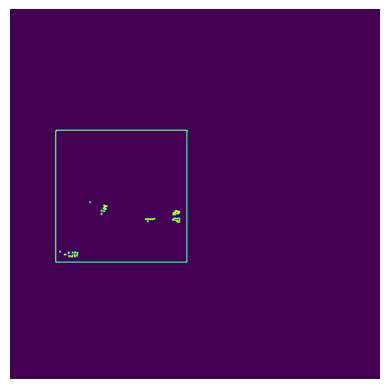

In [59]:
edges = cv2.dilate(cv2.Canny(thresh,100,1000),None)

plt.axis('off')
plt.imshow(edges)

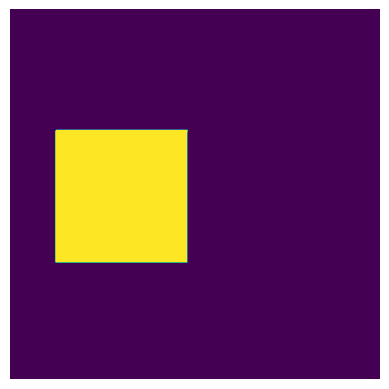

In [60]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((1024,1024), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)



In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2

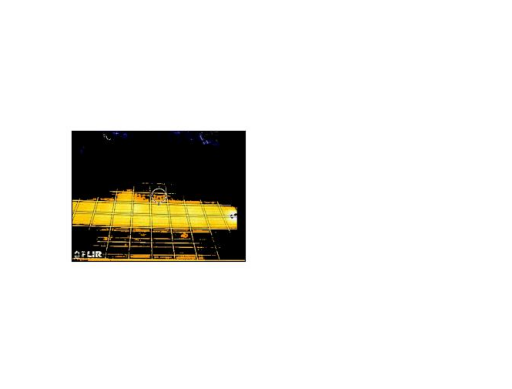

In [53]:
sample_image = cv2.imread('0.jpg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)


plt.axis('off')
plt.imshow(img)

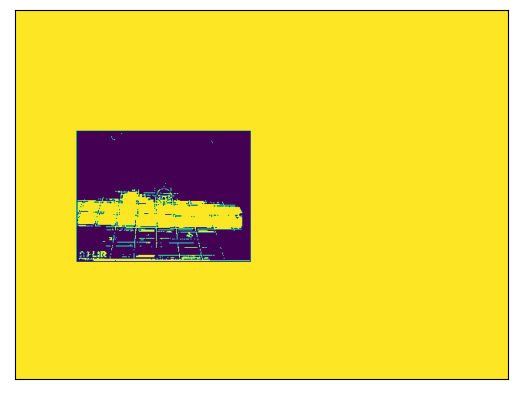

In [55]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray > thresh

fig = plt.imshow(img_otsu)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


In [2]:
def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

plt.axis('off')
plt.imshow(filtered)
plt.savefig('seg' +".jpg")


NameError: name 'img_otsu' is not defined

In [5]:


import cv2
import numpy as np

# Load the image
img = cv2.imread("0.jpg")

# Define the color range for the object you want to segment
lower_color = np.array([0,0,0])
upper_color = np.array([75,255,255])

# Create a mask that only selects pixels that fall within the defined color range
mask = cv2.inRange(img, lower_color, upper_color)

# Use the mask to segment the image
segmented = cv2.bitwise_and(img, img, mask=mask)

# Display the original and segmented images
cv2.imshow("Original", img)
cv2.imshow("Segmented", segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imwrite("Iou.jpg",segmented)

True

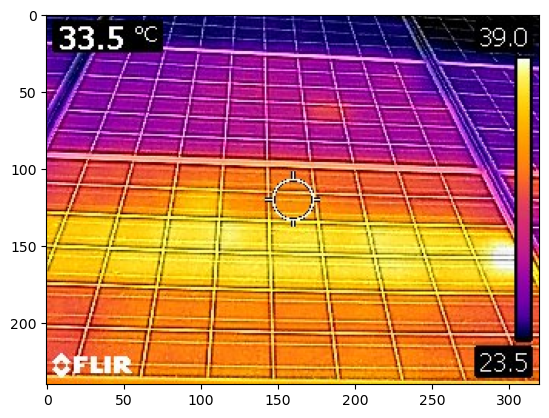

In [151]:
img = cv2.imread("FLIR0105.jpg")
result1= plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
result1.axes.get_xaxis().set_visible(True)
result1.axes.get_yaxis().set_visible(True)



In [163]:
# IoU calculation
intersection = np.logical_and(numpydata, numpydata2)
union = np.logical_or(numpydata, numpydata2)
iou_score = np.sum(intersection) / np.sum(union)
print('IoU is %s' % iou_score)

TypeError: unsupported operand type(s) for /: 'AxesImage' and 'AxesImage'

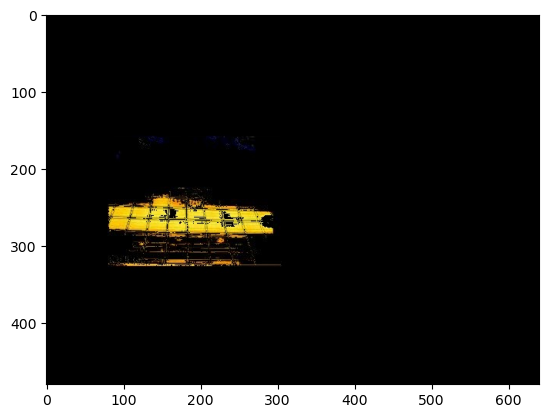

In [152]:
img2 = cv2.imread("Iou.jpg")
result2= plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
result2.axes.get_xaxis().set_visible(True)
result2.axes.get_yaxis().set_visible(True)

In [154]:
np.sum(intersection)

In [155]:
np.sum(union)

In [157]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("FLIR0105.jpg")

In [158]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im2 = plt.imread("Iou.jpg")

In [162]:
from numpy import asarray
numpydata = asarray(result1)
numpydata2 = asarray(result2)